In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
def plot_time_series(data):
    fig = plt.figure(figsize=(10, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

In [3]:
def draw_spectogram(data):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(data, y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [4]:
def draw_melspectogram(data):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(data, x_axis='time', y_axis='mel', sr=sr,fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [5]:
def draw_mfcc(data):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(data, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

## Raw Audio 구경해보기

In [15]:
y, sr = librosa.load('guitar_split/guitar1.wav') #우리가 흔히 아는 wav파일 3초짜리를 예시로 들어봅시다
y_2, sr = librosa.load('piano_split/piano30.wav')

In [16]:
print(y) #리스트 형태로 각 시간 별 amplitude가 나와있습니다.
print(sr) #Sampling rate 아까 말했죠? 1초짜리 음악에 몇 번 데이터를 샘플할 지 결정합니다.
print(len(y)) #총 3초짜리 데이터이므로 22050*3 = 66150개의 샘플이 있게 됩니다.

[0.         0.         0.         ... 0.1268277  0.15693152 0.10497314]
22050
66150


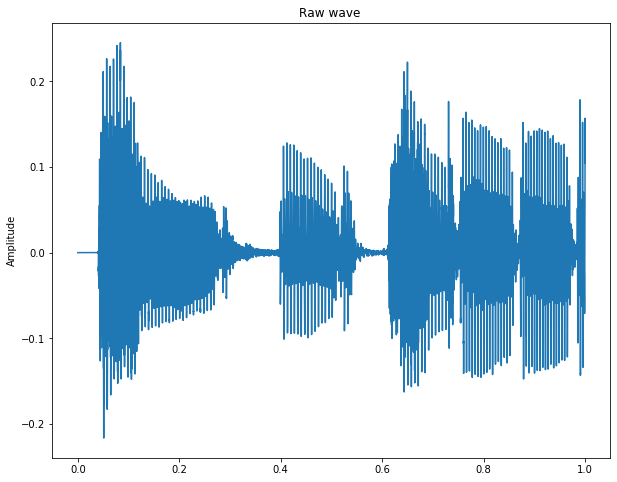

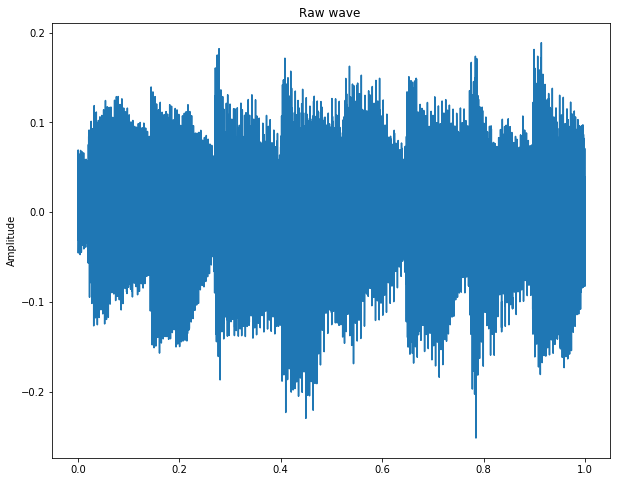

In [17]:
plot_time_series(y) # 우리가 흔히 하는 그 그림이죠?
plot_time_series(y_2)

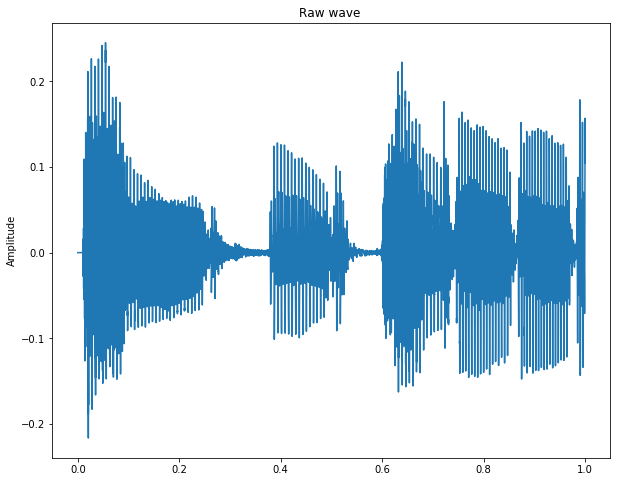

64102


In [20]:
y = librosa.effects.trim(y)
plot_time_series(y[0])
print(len(y[0]))

## 푸리에 변환 구경해보기

In [21]:
fourier_y = librosa.core.stft(y[0], hop_length=256, n_fft = 1024) # hop_length, window_size

In [22]:
print(fourier_y) # 잘 보면 복소수 형태입니다. 이 복소수는 위상의 형태를 가지고 있습니다.
print(fourier_y.shape) # 앞에 숫자가 한 번에 자르는 window의 크기 / 뒤에 숫자가 총 윈도우의 숫자입니다. 

[[-1.8216534e-08+0.00000000e+00j -8.5909985e-02+0.00000000e+00j
  -8.3767045e-01+0.00000000e+00j ... -2.7949119e-01+0.00000000e+00j
  -4.1905513e-01+0.00000000e+00j  7.5921781e-02+0.00000000e+00j]
 [-1.8241204e-08-2.64697796e-23j -6.7589238e-02-5.19745760e-02j
   2.4087112e-01-6.13599360e-01j ...  8.4387936e-02-3.26372564e-01j
   3.7932321e-01+1.13026582e-01j -1.6990730e-01+4.94817227e-01j]
 [-1.8314703e-08-4.79764755e-23j -2.1029232e-02-8.07309002e-02j
   2.4378903e-02+4.18837041e-01j ... -1.2266146e+00+1.03295043e-01j
  -2.6823530e-01+9.43543434e-01j  6.5361279e-01-7.11105317e-02j]
 ...
 [ 2.9968271e-11+4.79764755e-23j  1.7403867e-08+1.49147306e-09j
  -3.8387680e-09+1.43626995e-08j ...  4.4844745e-07+6.83088075e-08j
  -4.1460306e-03-1.20569756e-02j  1.7948123e-02+5.21754138e-02j]
 [ 3.0039998e-11+2.15066959e-23j  1.6054393e-08+1.24441613e-09j
  -2.4521089e-08+2.73737957e-08j ... -3.8594476e-07-1.81366957e-07j
   7.4055865e-03-1.03771705e-02j -4.4912204e-02-3.20457891e-02j]
 [ 3.00666

In [23]:
D = abs(fourier_y)**2 #제곱의 형태로 바꿔줍시다.

In [24]:
D_db = librosa.power_to_db(D, ref=np.max) #d 스케일로 바꿔주기!

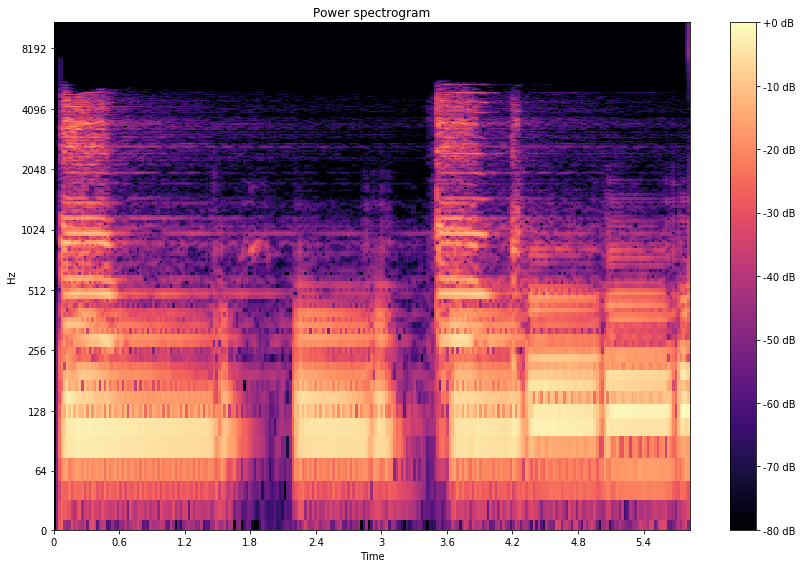

In [25]:
draw_spectogram(D_db)

In [26]:
mel_2 = librosa.feature.melspectrogram(S=D,hop_length=256,n_fft=1024) #Spectogram을 Melspectogram으로 넣어도 되고, y = y로 raw audio로 넣어도됩니다.
mel_2 = librosa.power_to_db(mel_2,ref=np.max)
melfb = librosa.filters.mel(22050, 1024)
print(D_db.shape) # Spectrogram
print(melfb.shape) # Filter Bank! Spectrogram과 Filter bank를 내적하면 됩니다 
print(mel_2.shape) # 

(513, 251)
(128, 513)
(128, 251)


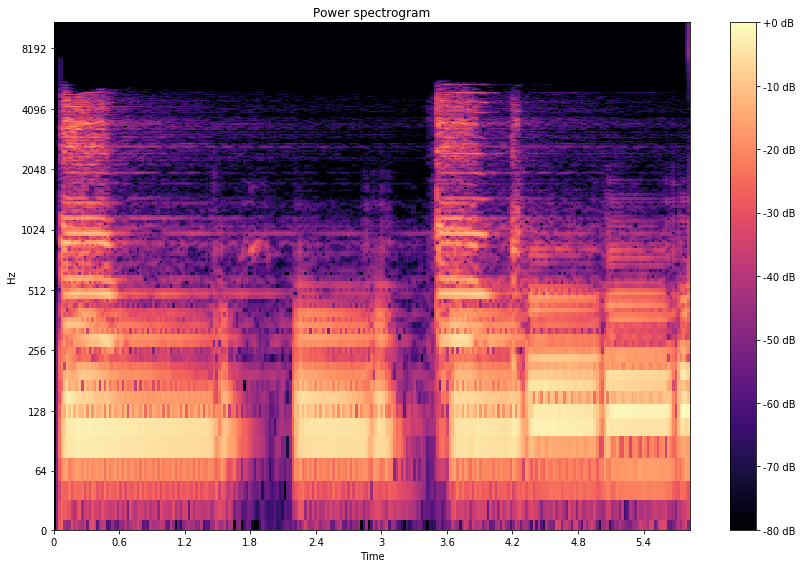

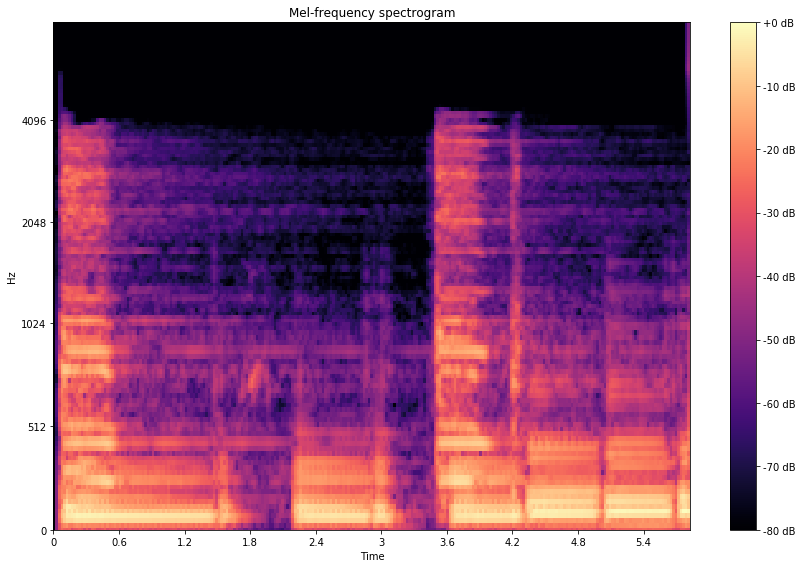

In [27]:
draw_spectogram(D_db)
draw_melspectogram(mel_2) #차이가 보이시나요?

In [31]:
y_mfcc = librosa.feature.mfcc(y[0],n_mfcc=20, n_fft = 1024, hop_length = 256)

In [32]:
print(y_mfcc.shape) # 3초를 130개 단위로 잘라서,한 frame당 14개의 피쳐를 뽑았네요!

(20, 251)


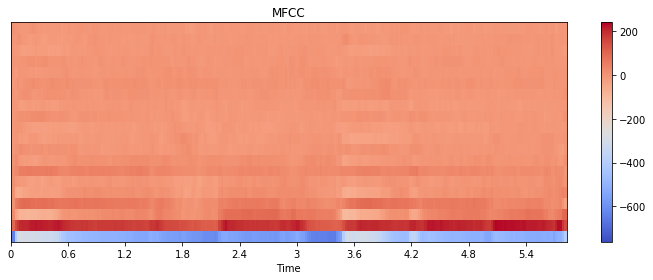

None


In [33]:
print(draw_mfcc(y_mfcc))

In [34]:
import os
import scipy.io.wavfile
guitar_path = "guitar_split/"
guitar_list = os.listdir(guitar_path)

piano_path = "piano_split/"
piano_list = os.listdir(piano_path)

In [35]:
a = 0
for item in piano_list:
    if a == 0 :
        y, sr = librosa.load(piano_path + item)
        y, index = librosa.effects.trim(y)
#         y = librosa.util.normalize(y)
        piano_sound = librosa.feature.melspectrogram(y=y).T
        piano_sound_2 = librosa.feature.mfcc(y=y,n_mfcc=13,norm='ortho').T
        a = 1
    else : 
        y, sr = librosa.load(piano_path + item)
        y, index = librosa.effects.trim(y)
#         y = librosa.util.normalize(y)
        temp_mfcc = librosa.feature.melspectrogram(y=y).T
        temp_mfcc_2 = librosa.feature.mfcc(y=y,n_mfcc=13,norm='ortho').T
        piano_sound = np.vstack([piano_sound,temp_mfcc])
        piano_sound_2 = np.vstack([piano_sound_2,temp_mfcc_2])

In [36]:
a = 0
for item in guitar_list:
    if a == 0 :
        y, sr = librosa.load(guitar_path + item)
        y, index = librosa.effects.trim(y) # 공백제거
        guitar_sound = librosa.feature.melspectrogram(y=y).T
        guitar_sound_2 = librosa.feature.mfcc(y=y,n_mfcc=13,norm='ortho').T
        a = 1
    else : 
        y, sr = librosa.load(guitar_path + item)
        y, index = librosa.effects.trim(y)
        temp_mfcc = librosa.feature.melspectrogram(y=y).T
        temp_mfcc_2 = librosa.feature.mfcc(y=y,n_mfcc=13,norm='ortho').T
        guitar_sound = np.vstack([guitar_sound,temp_mfcc])
        guitar_sound_2 = np.vstack([guitar_sound_2,temp_mfcc_2])

In [37]:
#case for Melspectrogram

piano_sound_re = piano_sound.reshape(-1,8,128)
guitar_sound_re =  guitar_sound[:-4].reshape(-1,8,128)
all_sound = np.concatenate((piano_sound_re,guitar_sound_re),axis = 0) #8 프레임씩 묶어서 생각하자

temp_1 = np.zeros(len(piano_sound_re))
temp_2 = np.ones(len(guitar_sound_re))
label = np.concatenate((temp_1,temp_2),axis = 0) #라벨링 0은 피아노 1은 기타

In [38]:
#case for MFCC

piano_sound_re_2 = piano_sound_2.reshape(-1,8,13)
guitar_sound_re_2 =  guitar_sound_2[:-4].reshape(-1,8,13)
all_sound_2 = np.concatenate((piano_sound_re_2,guitar_sound_re_2),axis = 0) #8 프레임씩 묶어서 생각하자

temp_1_2 = np.zeros(len(piano_sound_re_2))
temp_2_2 = np.ones(len(guitar_sound_re_2))
label_2 = np.concatenate((temp_1_2,temp_2_2),axis = 0) #라벨링 0은 피아노 1은 기타

In [39]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [43]:
train_X, test_X, train_y, test_y = train_test_split(all_sound, label, test_size = 0.2, stratify=label)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [41]:
train_X, test_X, train_y, test_y = train_test_split(all_sound_2, label_2, test_size = 0.2, stratify=label_2)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [44]:
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(64,2,padding = 'valid',strides=2, input_shape = (8,128)),
  tf.keras.layers.BatchNormalization(),
#   tf.keras.layers.LSTM(128, return_sequences = True),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='elu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='elu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.Dense(2, activation='softmax')
])

checkpoint = []

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_X,
          train_y,
          batch_size=2048,
          epochs=20,validation_split = 0.1)

Train on 30015 samples, validate on 3336 samples
Epoch 1/20
30015/30015 [==============================] - 2s 71us/sample - loss: 0.7913 - acc: 0.7444 - val_loss: 0.7788 - val_acc: 0.7896
Epoch 2/20
30015/30015 [==============================] - 1s 46us/sample - loss: 0.5521 - acc: 0.8592 - val_loss: 0.5814 - val_acc: 0.8468
Epoch 3/20
30015/30015 [==============================] - 1s 44us/sample - loss: 0.5052 - acc: 0.8795 - val_loss: 0.5495 - val_acc: 0.8615
Epoch 4/20
30015/30015 [==============================] - 1s 45us/sample - loss: 0.4794 - acc: 0.8895 - val_loss: 0.4999 - val_acc: 0.8804
Epoch 5/20
30015/30015 [==============================] - 1s 45us/sample - loss: 0.4603 - acc: 0.8976 - val_loss: 0.4727 - val_acc: 0.8894
Epoch 6/20
30015/30015 [==============================] - 1s 45us/sample - loss: 0.4458 - acc: 0.9032 - val_loss: 0.4509 - val_acc: 0.8942
Epoch 7/20
30015/30015 [==============================] - 1s 44us/sample - loss: 0.4305 - acc: 0.9076 - val_loss: 0.4

No handles with labels found to put in legend.


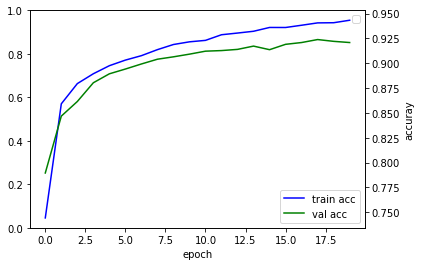

In [45]:
%matplotlib inline
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='lower right')

plt.show()

In [46]:
pred_y = model.predict_classes(test_X)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y.T[1],pred_y))

0.9279203645958264


In [47]:
val, sr = librosa.load('piano_val.wav',sr = 22050)
val_1, sr = librosa.load('guitar_val.mp3',sr = 22050)
val, index = librosa.effects.trim(val)
val_1, index = librosa.effects.trim(val_1)


In [48]:
val_list = []
for i in range(int(len(val)/66150)):
    val_list.append(val[66150*(i):66150*(i+3)])

val_list_1 = []
for i in range(int(len(val_1)/66150)):
    val_list_1.append(val_1[66150*(i):66150*(i+3)])

In [49]:
a = 0
for item in val_list:
    if a == 0 :
        val_piano = librosa.feature.melspectrogram(y=item).T
        val_piano_2 = librosa.feature.mfcc(y=item,n_mfcc=13,norm='ortho').T
        a = 1
    else : 
        temp_mfcc = librosa.feature.melspectrogram(y=item).T
        temp_mfcc_2 = librosa.feature.mfcc(y=item,n_mfcc=13,norm='ortho').T        
        val_piano = np.vstack([val_piano,temp_mfcc])
        val_piano_2 = np.vstack([val_piano_2,temp_mfcc_2])        
        
a = 0
for item in val_list_1:
    if a == 0 :
        val_guitar = librosa.feature.melspectrogram(y=item).T
        val_guitar_2 = librosa.feature.mfcc(y=item,n_mfcc=13,norm='ortho').T
        a = 1
    else : 
        temp_mfcc = librosa.feature.melspectrogram(y=item).T
        temp_mfcc_2 = librosa.feature.mfcc(y=item,n_mfcc=13,norm='ortho').T        
        val_guitar = np.vstack([val_guitar,temp_mfcc])
        val_guitar_2 = np.vstack([val_guitar_2,temp_mfcc_2])     

In [50]:
# val_sound = librosa.util.normalize(val_sound)
# val_sound_1 = librosa.util.normalize(val_sound_1)

val_data_piano_1 = val_piano[:-4].reshape(-1,8,128)
val_data_guitar_1 =  val_guitar[:-5].reshape(-1,8,128)
all_val_1 = np.concatenate((val_data_piano_1,val_data_guitar_1),axis = 0)

test_1 = np.zeros(len(val_data_piano_1))
test_2 = np.ones(len(val_data_guitar_1))

label_val = np.concatenate((test_1,test_2),axis = 0)

In [51]:
# val_sound = librosa.util.normalize(val_sound)
# val_sound_1 = librosa.util.normalize(val_sound_1)

val_data_piano_2 = val_piano_2[:-4].reshape(-1,8,13)
val_data_guitar_2 =  val_guitar_2[:-5].reshape(-1,8,13)
all_val_2 = np.concatenate((val_data_piano_2,val_data_guitar_2),axis = 0)
all_val_2 = librosa.util.normalize(all_val_2)

test_1_2 = np.zeros(len(val_data_piano_2))
test_2_2 = np.ones(len(val_data_guitar_2))

label_val_2 = np.concatenate((test_1_2,test_2_2),axis = 0)

In [53]:
from sklearn.metrics import confusion_matrix
pred_y = model.predict_classes(all_val_1)
print(pred_y)
print(accuracy_score(to_categorical(label_val).T[1],pred_y))
print(confusion_matrix(to_categorical(label_val).T[1],pred_y))

[0 0 0 ... 0 0 0]
0.9158035415970598
[[1019   16]
 [ 236 1722]]


In [ ]:
from sklearn.metrics import confusion_matrix
# pred_y = model.predict_classes(all_data_val.drop(columns='type'))
# print(pred_y)
# print(accuracy_score(all_data_val['type'],pred_y))
pred_y = model.predict_classes(all_val_2)
print(pred_y)
print(accuracy_score(to_categorical(label_val_2).T[1],pred_y))
print(confusion_matrix(to_categorical(label_val_2).T[1],pred_y))

In [ ]:
# https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html
#https://github.com/musikalkemist/DeepLearningForAudioWithPython